<a href="https://colab.research.google.com/github/psinha25/ece381-aml/blob/master/hw3/HW-3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 3 #
### Due: Tuesday, October 10th to be submitted via Canvas by 11:59 pm ###
### Total points: **90** ###

Your homework should be written in a python notebook. If you prefer, you can work in groups of two. **Please note that only one student per team needs to submit the assignment on Canvas but make sure to include both students' names, UT EIDs and the homework group.**  

For any question that requires a handwritten solution, you may upload scanned images of your solution in the notebook or attach them to the assignment . You may write your solution using markdown as well.

Please make sure your code runs and the graphs and figures are displayed in your notebook before submitting. (%matplotlib inline)

1. Homework Group 7
2. Student Names - Prasoon Sinha (ps35324), Evan King (ek8755)

## Q1. (30 points) - Comparing MLPs

In this problem, we will be comparing different MLP configurations on the California Housing dataset and the Diabetes dataset.

In [1]:
import numpy as np
from copy import deepcopy
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing, load_diabetes

In [2]:
seed = 42

In [3]:
# Load the California Housing dataset and do train/val/test split
california_housing = fetch_california_housing()
housing_X, housing_y = california_housing['data'], california_housing['target']
housing_X_train, housing_X_tmp, housing_y_train, housing_y_tmp = train_test_split(housing_X, housing_y, test_size=0.4, random_state=seed)
housing_X_val, housing_X_test, housing_y_val, housing_y_test = train_test_split(housing_X_tmp, housing_y_tmp, test_size=0.5, random_state=seed)

housing_scaler = StandardScaler()
housing_X_train = housing_scaler.fit_transform(housing_X_train)
housing_X_val = housing_scaler.transform(housing_X_val)
housing_X_test = housing_scaler.transform(housing_X_test)
print(california_housing['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [4]:
# Load the Diabetes dataset and do train/val/test split
diabetes = load_diabetes()
diabetes_X, diabetes_y = diabetes['data'], diabetes['target']

diabetes_X_train, diabetes_X_tmp, diabetes_y_train, diabetes_y_tmp = train_test_split(diabetes_X, diabetes_y, test_size=0.4, random_state=seed)
diabetes_X_val, diabetes_X_test, diabetes_y_val, diabetes_y_test = train_test_split(diabetes_X_tmp, diabetes_y_tmp, test_size=0.5, random_state=seed)

diabetes_scaler = StandardScaler()
diabetes_X_train = diabetes_scaler.fit_transform(diabetes_X_train)
diabetes_X_val = diabetes_scaler.transform(diabetes_X_val)
diabetes_X_test = diabetes_scaler.transform(diabetes_X_test)
print(diabetes['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

**Part 1** **(10 pts)**. Write the training and evaluation functions of the MLP. Use the default parameter values of sklearn.neural_network.MLPRegressor except:

*   **hidden_layer_size**: given by train_mlp parameter
*   **learning_rate_init**: given by a list of search space
*   **random_state**: given by train_mlp parameter
*   **max_iter**: fix at 300



In [6]:
def train_mlp(hidden_layer_size, X_train, y_train, X_val, y_val, seed):
    learning_rate_list = [1e-1, 1e-2, 1e-3, 1e-4]
    best_r2 = -np.inf # Determine the best model based on the R2 score on validation set # TO HIDE
    for lr in learning_rate_list:
        # Initialize MLPRegressor
        ### START CODE ###
        model = MLPRegressor(hidden_layer_sizes=hidden_layer_size, learning_rate_init=lr, random_state=seed, max_iter=300)
        ### END CODE ###

        # Fit the MLPRegressor to training data
        ### START CODE ###
        model.fit(X_train, y_train)
        ### END CODE ###

        # Predict and evaluate on train and validation data
        mse_train, r2_train = eval_model(model, X_train, y_train)
        mse_val, r2_val = eval_model(model, X_val, y_val)
        print(f"Learning rate: {lr} MSE train: {mse_train} R2 train: {r2_train} MSE val: {mse_val} R2 val: {r2_val}")

        # Record the best model according to R2 score on validation set
        if r2_val > best_r2:
            ### START CODE ###
            best_model = model
            best_lr = lr
            best_r2 = r2_val
            ### END CODE ###

    return best_model, best_lr, best_r2

def eval_model(model, X, y):
    # Predict and evaluate
    ### START CODE ###
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    ### END CODE ###
    return mse, r2


**Part 2** **(5 pts)**.
Train two MLPs on the **housing dataset** with the following two different hidden layer size configurations and show their **MSE** and **R2 score** on the **test set**.
*   (8)
*   (64, 64)

In [7]:
# hidden layer(s) size (8)
best_model1, best_lr1, best_r21 = train_mlp(hidden_layer_size=(8), X_train=housing_X_train, 
    y_train=housing_y_train, X_val=housing_X_val, y_val=housing_y_val, seed=seed)

Learning rate: 0.1 MSE train: 0.35027525330390197 R2 train: 0.735982815073061 MSE val: 0.37267740826962115 R2 val: 0.714497094984831
Learning rate: 0.01 MSE train: 0.334521824008715 R2 train: 0.7478568370492932 MSE val: 0.35351651284456515 R2 val: 0.7291759866620738
Learning rate: 0.001 MSE train: 0.3343894234574139 R2 train: 0.7479566329112834 MSE val: 0.3549904264505432 R2 val: 0.7280468422414288
Learning rate: 0.0001 MSE train: 0.4331418308870668 R2 train: 0.673522791615294 MSE val: 0.4592155463352194 R2 val: 0.6482014482295081


/Users/ek8755/miniforge3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [16]:
mse1, r21 = eval_model(best_model1, housing_X_test, housing_y_test)
print('Metrics for best 8 layer model on test set\n' + '-' * 50)
print(f'MSE: {mse1:.4f}')
print(f'R2 : {r21:.4f}')

Metrics for best 8 layer model on test set
--------------------------------------------------
MSE: 0.3500
R2 : 0.7447


In [8]:
# hidden layer(s) size (64, 64)
best_model2, best_lr2, best_r22 = train_mlp(hidden_layer_size=(64, 64), X_train=housing_X_train, 
    y_train=housing_y_train, X_val=housing_X_val, y_val=housing_y_val, seed=seed)

Learning rate: 0.1 MSE train: 1.3327360827774057 R2 train: -0.004539217391315908 MSE val: 1.3100017113924098 R2 val: -0.003573830552108914
Learning rate: 0.01 MSE train: 0.16854813399278593 R2 train: 0.8729581851937008 MSE val: 0.30977096679939264 R2 val: 0.7626888323571255
Learning rate: 0.001 MSE train: 0.20584124261737996 R2 train: 0.844848801320963 MSE val: 0.28680314360190806 R2 val: 0.7802841576954743
Learning rate: 0.0001 MSE train: 0.2674151290220707 R2 train: 0.7984379744062987 MSE val: 0.31262030057434054 R2 val: 0.760505997948454


/Users/ek8755/miniforge3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [15]:
mse2, r22 = eval_model(best_model2, housing_X_test, housing_y_test)
print('Metrics for best 64x64 layer model on test set\n' + '-' * 50)
print(f'MSE: {mse2:.4f}')
print(f'R2 : {r22:.4f}')

Metrics for best 64x64 layer model on test set
--------------------------------------------------
MSE: 0.2715
R2 : 0.8020


**Part 3** **(5 pts)**. Train a **linear regression model** on the **housing dataset** and show their MSE and R2 scores on the test set. How do the performances of the two MLPs and the linear regression model compare, and what do you think causes the difference?

In [19]:
linear_model = LinearRegression()
linear_model.fit(housing_X_train, housing_y_train)
mse_linear, r2_linear = eval_model(linear_model, housing_X_test, housing_y_test)

In [20]:
print('Metrics for linear regression on test set\n' + '-' * 50)
print(f'MSE: {mse_linear:.4f}')
print(f'R2 : {r2_linear:.4f}')

Metrics for linear regression on test set
--------------------------------------------------
MSE: 0.5546
R2 : 0.5955


> Both MLP models outperform linear regression, with the (64, 64) layer MLP having the biggest positive difference in performance. There are several possible reasons why the MLP models outperform linear regression in this case:
>
> - **There may be a non-linear relationship between predictor and target variables.** In this case, the MLP is better equipped to learn this non-linear relationship than linear regression, which is only able to fit a linear function to the input data.
> - **There are many instances in the dataset.** Building on the first point, this dataset is quite large with over 20,000 instances. Provided this amount of data, the MLP is better able to identify more complex patterns than the linear function that linear regression attempts to estimate.
> - **There are a large number of different predictor variables.** While linear regression can still perform well on data with a reasonably large number of features or predictors (in this case, 7 of them), it could be the case that MLP outperforms since NNs are generally better equipped to handle a growing number of predictor variables or features.

**Part 4** **(5 pts)**. Now, train two MLPs on the **diabetes dataset** with the following two different hidden layer size configurations and show their **MSE** and **R2 score** on the **test set**.
*   (8)
*   (64, 64)

In [24]:
# hidden layer(s) size (8)
best_model1, best_lr1, best_r21 = train_mlp(hidden_layer_size=(8), X_train=diabetes_X_train, 
    y_train=diabetes_y_train, X_val=diabetes_X_val, y_val=diabetes_y_val, seed=seed)

Learning rate: 0.1 MSE train: 2476.3467595024326 R2 train: 0.585898539459291 MSE val: 2517.632414913163 R2 val: 0.5632838571464868
Learning rate: 0.01 MSE train: 2923.5109570774443 R2 train: 0.511122522487204 MSE val: 2897.769455293564 R2 val: 0.4973441349506217
Learning rate: 0.001 MSE train: 23187.857938274905 R2 train: -2.8775368603787332 MSE val: 21269.44841782192 R2 val: -2.689462932964871
Learning rate: 0.0001 MSE train: 28400.91006149956 R2 train: -3.7492776575100377 MSE val: 26368.757515117697 R2 val: -3.5740045312528217


/Users/ek8755/miniforge3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ek8755/miniforge3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ek8755/miniforge3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [25]:

mse1, r21 = eval_model(best_model1, diabetes_X_test, diabetes_y_test)
print('Metrics for best 8 layer model on diabetes test set\n' + '-' * 50)
print(f'MSE: {mse1:.4f}')
print(f'R2 : {r21:.4f}')

Metrics for best 8 layer model on diabetes test set
--------------------------------------------------
MSE: 3031.3141
R2 : 0.4760


In [26]:
# hidden layer(s) size (64, 64)
best_model2, best_lr2, best_r22 = train_mlp(hidden_layer_size=(64, 64), X_train=diabetes_X_train, 
    y_train=diabetes_y_train, X_val=diabetes_X_val, y_val=diabetes_y_val, seed=seed)

Learning rate: 0.1 MSE train: 1206.4253098148006 R2 train: 0.7982582685924138 MSE val: 3723.5437400131673 R2 val: 0.35410282682550265
Learning rate: 0.01 MSE train: 2243.7063917974406 R2 train: 0.6248012963844647 MSE val: 2647.3837909669965 R2 val: 0.5407767905292498


/Users/ek8755/miniforge3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning rate: 0.001 MSE train: 2708.36400051836 R2 train: 0.5470999834789378 MSE val: 2934.445638247401 R2 val: 0.49098217318872484
Learning rate: 0.0001 MSE train: 25172.631134438427 R2 train: -3.2094360486565927 MSE val: 23365.034950969693 R2 val: -3.0529697190830607


/Users/ek8755/miniforge3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [27]:
mse2, r22 = eval_model(best_model2, diabetes_X_test, diabetes_y_test)
print('Metrics for best 64x64 layer model on diabetes test set\n' + '-' * 50)
print(f'MSE: {mse2:.4f}')
print(f'R2 : {r22:.4f}')

Metrics for best 64x64 layer model on diabetes test set
--------------------------------------------------
MSE: 3048.8015
R2 : 0.4729


**Part 5** **(5 pts)**. Train another linear regression model on the **diabetes dataset** and show its **MSE** and **R2 score** on the **test set**. How do the performances of two MLPs and the linear regression model compare? Is the performance order on the diabetes dataset the same as the one on the housing dataset? If not, what causes the difference?

In [28]:
linear_model = LinearRegression()
linear_model.fit(diabetes_X_train, diabetes_y_train)
mse_linear, r2_linear = eval_model(linear_model, diabetes_X_test, diabetes_y_test)

In [29]:
print('Metrics for linear regression on diabetes test set\n' + '-' * 50)
print(f'MSE: {mse_linear:.4f}')
print(f'R2 : {r2_linear:.4f}')

Metrics for linear regression on diabetes test set
--------------------------------------------------
MSE: 3245.6114
R2 : 0.4389


> In this case, all models (MLP and linear regression) perform quite badly. The overall ranking is the same: (64, 64) layer MLP is best (or least bad), (8) layer MLP is second best, and linear regression is worst. In this sense, the "order" is the same, but the difference in performance between the NNs and linear regression is less pronounced (especially in terms of the relative R2 values, which are closer than they were for the housing dataset). There are several possible reasons for this:
> 
> - **Input dataset is too small.** There are only a little over 400 instances in the diabetes dataset, which may not be a sufficient amount of data to train any model. It certainly is not enough to train a NN like the MLP models, which require a significantly larger dataset in order to converge on good performance. It could be the case that linear regression is generally better equipped to deal with the sparsity of input data, so the relative "badness" of performance of each model is a little closer.
> - **Number of predictor variables.** Again, there are quite a few predictor variables or features used as input to these models given the diabetes dataset. Given that there are 10 input variables and only ~400 instances, this may be the reason why linear regression does not perform well despite otherwise being capable of handling smaller datasets in general. 

# Q2. (20 points) Tensorflow Playground

In this question, you will be playing with [Tensorflow Playground](https://playground.tensorflow.org).


Select **Classification** as the Problem Type. Among the four datasets shown in DATA, please select the top left dataset.

Use the following settings as the DEFAULT settings for all subquestions:


*   Learning rate = 0.03
*   Activation = Tanh
*   Regularization = None
*   Ratio of training to test data = 50%
*   Noise = 0
*   Batch Size = 30
*   input as  𝑋1  with  𝑋2
*   One hidden layer with 4 neurons

a) **(4 pts)** Use the DEFAULT setting and run two experiments -

1.   Using Tanh as the activation function
2.   Using the Linear activation function.

Report the train, test losses for both at the end of 1000 epochs. What qualitative difference do you observe in the decision boundaries obtained? What do you think is the reason for this?

> When using the activation function Tanh, after 1000 epochs the train loss is 0.008 and the test loss is 0.017. Meanwhile, when using the activation function Linear, after 1000 epochs the train loss is 0.500 and the test loss is 0.501.

> As mentioned in the Tensor Flow playground, the background color indicates the predition of the network for a particular area in the features space. The intensity of the color represents the confidence the network has in its prediction. With the Tanh activation function, we see a clear separation between what the network predicts as orange labels and blue labels (based on the background colors). Even more important, its boundary is correct and more circular in nature. Meanwhile, the Linear activation function doesn't allow the network to learn this boundary. The background colors are very faint and really not distinguishable, although looking closely we see a very faint linear boundary. Hence, the decision boundary for the Tanh activation function is more complex and non-linear than the decision boundary for the Linear activation function.

> The Linear activation function is a linear function, which means that it outputs a linear combination of its inputs. This limits the ability of the neural network to learn complex relationships between the input and output data; it is only useful if the underlying relationship between the feature space and lable is linear, which it is not. Meanwhile, the Tanh activation function is a non-linear function, which means that it can output a more complex relationship between its inputs. This makes it more suitable for learning complex relationships between the input and output data like the one we use in this question.

We will now study the effect of certain variations in the network structure or training process, keeping all other aspects the same as in the DEFAULT setting specified above, with Tanh as the activation.

b) **(4 pts)** Effect of number of hidden units: Keep other settings the same as in DEFAULT.

1.   Report the training loss and test loss at the end of 1000 epochs using 2 neurons and 8 neurons in the hidden layer.
2.   What do you observe in terms of the decision boundary obtained as the number of neurons increases? What do you think is the reason for this?

> With two neurons in the hidden layer, the train loss is 0.242 and the test loss is 0.274. Meanwhile with eight neurons in the hidden layer, the train loss is 0.008 and the test loss is 0.015.

> Unlike the previous problem, with both 2 neurons and 8 neurons the network presents a clear boundary between what it labels as 1 (blue) and -1 (orange). However, with 2 neurons the boundary does not accurately capture the relationship between the features space ($X_1$ and $X_2$) and the labels, as several labels are incorrectly predicted. Meanwhile, with 8 neurons the boundary is very accurate (circular) and captures the relationship between the feature space and label quite well.

> As the number of hidden units increases, the decision boundary becomes more complex and non-linear. This is because the neural network has more parameters to learn, allowing the newtork to learn more complex relationships between the inputs and output.

c) **(4 pts)** Effect of Learning rate and number of epochs: Keep other settings the same as in DEFAULT.

1.   For learning rate 10, 1, 0.1, 0.01 and 0.0001, report the train, test losses at the end of 100 epochs, 500 epochs and 1000 epochs respectively.
2.   What do you observe from the change of loss vs learning rate, and the change of loss vs epoch numbers? Also report your observations on the training and test loss curve (observe if you see noise for certain learning rates and reason why this is happening).

| Learning Rate | Number of Epochs | Training Loss | Test Loss |
| ------------- | ----------------- | ------------- | ----------|
| 10            | 100               | 0.704         | 0.719     |
| 10            | 500               | 0.712         | 0.728     |
| 10            | 1000              | 0.712         | 0.736     |
| 1             | 100               | 0.004         | 0.016     |
| 1             | 500               | 0.000         | 0.010     |
| 1             | 1000              | 0.000         | 0.010     |
| 0.1           | 100               | 0.030         | 0.033     |
| 0.1           | 500               | 0.005         | 0.012     |
| 0.1           | 1000              | 0.002         | 0.010     |
| 0.01          | 100               | 0.415         | 0.408     |
| 0.01          | 500               | 0.070         | 0.065     |
| 0.01          | 1000              | 0.031         | 0.034     |
| 0.0001        | 100               | 0.560         | 0.550     |
| 0.0001        | 500               | 0.543         | 0.533     |
| 0.0001        | 1000              | 0.525         | 0.516     |

> We begin by considering loss vs. learning rate. We will keep the numer of epochs constant, analyzing the rows where the number of epochs is 1000. As the learning rate increases from 0.0001 to 10, we see a general trend. The training loss initially decreases significantly as the learning rate increases. For example, while the training loss is 0.525 with a learning rate of 0.0001, it drops to 0.031 with a learning rate of 0.01, and then 0.002 and 0 with a learning rate of 0.01 and 1, respectively. However, for the very high learning rat eof 10, the train loss increases signficiantly up to 0.712, which indicates divergence. We see a similar trend with the test loss, where it decreases initially and then increases with very high learning rates. Lower learning rates lead to slower convergence or potentially getting stuck at local minima, whereas too high of a learning rate can cause divergence or overshooting the optimal weights. This shows the importance of picking an appropriate learning rate to achieve faster convergence.

> We now analyze the loss vs. number of epochs by keeping a fixed learning rate of 0.01. Both the training and test losses generally decrease as the number of epochs increases, showing that the model is learning and improving over time. However, after a certain number of epochs, the improvement in the loss becomes slower and even plateaus. Hence, there are diminishing returns in model performance beyond a certain number of epochs.

> Finally, we observe that for higher learning rates like 10 and a little bit in 1, there is noise in the train and test loss curves. This noise probably occurs because the learning rates are so high that the model's weight updates are oscillating, and the model fails to converge to a stable solution. Essentially, it overshoots the minimum. For lower learning rates, we see smoother and monotonically decreasing loss curves.

d) **(4 pts)** Effect of the number of layers:

1.   Change your activation to ReLU and use a single hidden layer with 4 neurons and then add another hidden layer with 3 neurons and train both your models for 1000 epochs.
2.   Comment on your final models and decision boundaries and observe your training and test loss curves as well.

> The network with one hidden layer of 4 neurons achieves a train loss of 0.004 and a test loss of 0.005, while the network with the additional hidden layer with 3 neurons achieves a train and test loss of 0.001 and 0.002, respectively. Unlike when we used the Tanh activation function, with the ReLU activation function the boundaries for both our networks are not curved. Instead they consistent of straight lines to form a shape as the bounardy (hexagon for the one hidden layer function and octagon for the two hidden layer function). Clearly, both models perform well in learning the relationship between the feature space and labels, but the two hidden layers does every so slightly better. It's boundary curve is also a bit more complex (octagon rather than hexagon). However, for this particular dataset, a two hidden layer network might not be necessary, as the one hidden layer network performs nearly the same. This is also seen in the train and test loss curves, where both of networks quickly learn the boundary relationship (decreasing the losses) and then have diminishing returns over the course of the 1000 epochs.


e) **(4 pts)** Use the DEFAULT setting. Play around with any hyperparameters, network architectures or input features (such as  sin(𝑋1),𝑋21  etc.), and report the best train and test loss you obtain (test loss should be no greater than 0.06). Attach the screenshot showing your full network, output and the parameters. Briefly justify your results, and comment on what helps/what doesn't help with lowering the loss, etc.

> Below is the screenshot of our network, output, and parameters. We achieve a train loss of 0.000 and test loss of 0.001 after 1000 epochs. This was achieved by including two more neurons in the inputs layer: $X_1^2$ and $X_2^2$. Everything else was kept the same as the DEFAULT setting.

> Including these two transformations of $X_1$ and $X_2$ (squaring them) was very helpful, as the boundary between the network needs to learn is a circle. Now the equation of a circle squares its terms, and hence doing the same with the input feature allowed our network to find the exact circular boundary.

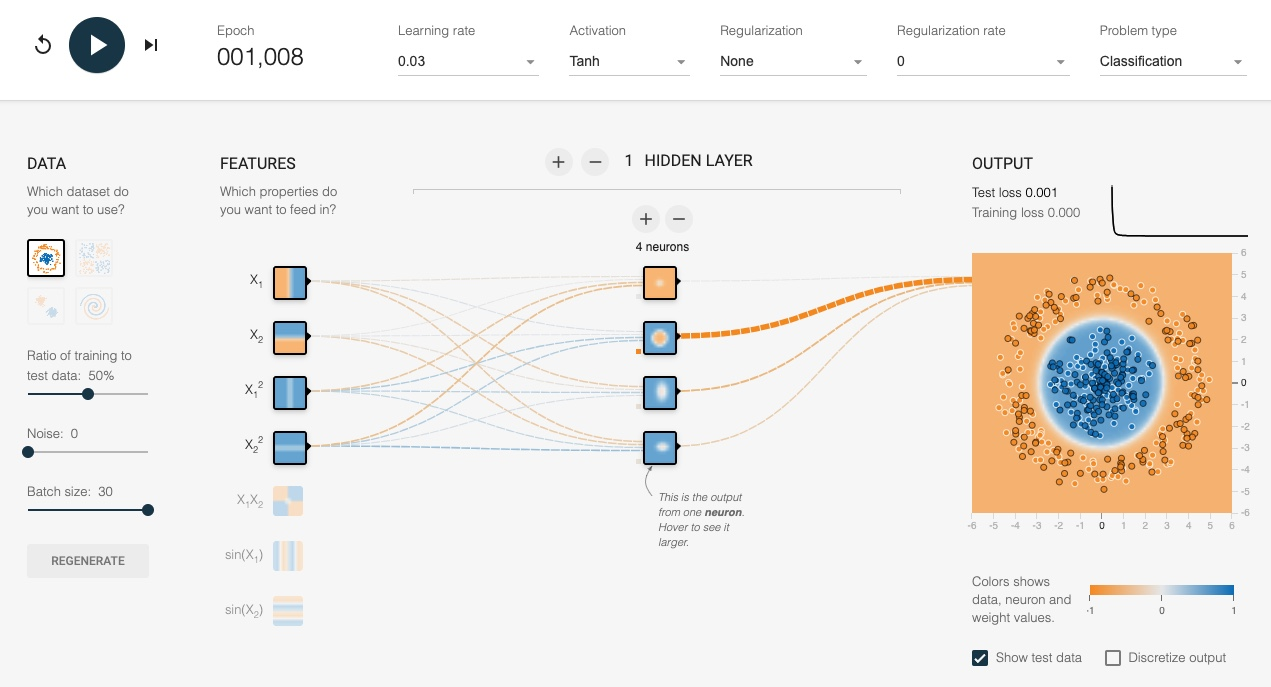

In [14]:
from IPython.display import Image, display
display(Image("/content/q2_e_screenshot.jpg", width=1000, height=500))

# Q3. (10 points) - Principal Component Analysis

Consider a set of data points $\{x_1, x_2, ... x_N\}$ where each $x_i \in \mathbb{R}^d$, given to you after centering, i.e., $\frac{1}{N}\sum_{i=1}^{N}x_i = 0$.

Now suppose you want to project this data on a single unit vector given by $u$ by learning an appropriate $u$. Show that, for learning $u$, minimizing the residual of the projections computed by the squared error between the projected data and the original data is equivalent to maximizing the variance of the projections. Hint : the projection of an $x$ on a unit vector $u$ is given by $(x^{T}u)u$.


# Q4. (20 points) - Principal Component Analysis


In this problem we will be applying PCA and T-SNE on the Superconductivity Dataset. More details on the dataset is present [here](https://archive.ics.uci.edu/ml/datasets/Superconductivty+Data#). The goal here is to predict the critical temperature of a superconductor based on the features extracted.

First use Principal Component Analysis (PCA) to solve this problem.  

* **Part 1. (5 points)** Perform the following steps to prepare the dataset:
    * Load the dataset from the "Q4data.csv" file provided as a dataframe df.

    * Select the **'critical_temp'** column as the target column and the rest of the columns from the dataframe df as X.

    * Split the dataset into train and test set with 35% data in test set and random_state = 42

    * Perform [Standard Scaling](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) on the dataset. Remember that when we have training and testing data, we fit preprocessing parameters on training data and apply them to all testing data. You should scale only the features (independent variables), not the target variable y.
    
    `Note: X should have 81 features.`
    




In [ ]:
# Only use this code block if you are using Google Colab.
# If you are using Jupyter Notebook, please ignore this code block. You can directly upload the file to your Jupyter Notebook file systems.
from google.colab import files

## It will prompt you to select a local file. Click on “Choose Files” then select and upload the file.
## Wait for the file to be 100% uploaded. You should see the name of the file once Colab has uploaded it.
uploaded = files.upload()

Saving Q4data.csv to Q4data.csv


In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SequentialFeatureSelector
import os, sys, re
import time
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt

df = pd.read_csv("Q4data.csv")

In [62]:
y = df["critical_temp"]
X = df.drop(columns=["critical_temp"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

scaler = StandardScaler()

### START CODE ###
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
### END CODE ###

* **Part 2 (5 points)** Use [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) and reduce the dimension of X_train to the following number of components: `[3,20,40,60,81]`. For each of the five datasets, print the cumulative variance explained by the principal components `N = [3,20,40,60,81]`. (i.e. what percentage of variance in the original dataset is explained if we transform the dataset to have 3,20,40,60 and 81 principal components respectively).

  `Note : PCA should be fit on X_train and the components thus learnt should be later used to transform X_test`

In [60]:
from sklearn.decomposition import PCA

nums = [3,20,40,60,81]
var = []

for num in nums:
    ### START CODE ###
    pca = PCA(n_components=num)
    pca.fit(X_train)
    ### END CODE ###

    ### START CODE ###
    pca.transform(X_test)
    ### END CODE ###

    ### START CODE ###
    var.append(sum(pca.explained_variance_ratio_))
    ### END CODE ###

    print(f"Cumulative variance explained by {num} components is {var[-1]*100:.4f}") # cumulative sum of variance explained with [n] features

Cumulative variance explained by 3 components is 58.9261
Cumulative variance explained by 20 components is 96.9415
Cumulative variance explained by 40 components is 99.6137
Cumulative variance explained by 60 components is 99.9531
Cumulative variance explained by 81 components is 100.0000


* **Part 3. (5 points)** Plot the cumulative variance explained by the principal components using the training data. The plot should display the number of components on X-axis and the cumulative explained variance on the y-axis. What do you understand from the plot obtained?

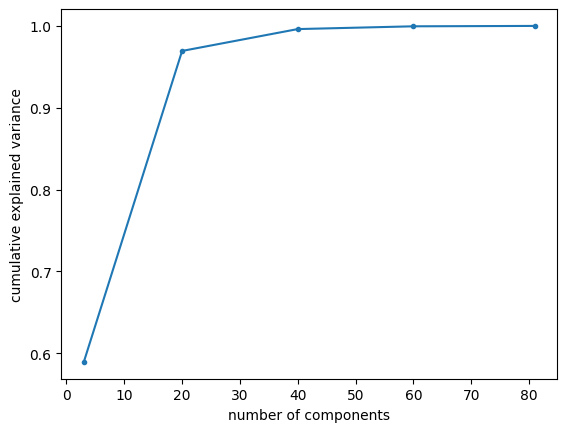

In [58]:
### START CODE ###
plt.plot(nums, res, marker='.')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
### END CODE ###

plt.show()

> The plot suggests that the percentage of variance explained increases logarithmically as a function of the number of components. In practice, this indicates that we can probably choose a lower, optimal number of components (somewhere near the "elbow" of the log curve) to sufficiently explain nearly all of the variance in the dataset. There are diminishing returns to increasing the percentage of variance explained as we continue to increase the number of components, so adding more components does not help us much beyond a certain point.

* **Part 4. (5 points)** For each of the reduced dataset, obtained in part 2.2, fit a linear regression model on the train data and show how adjusted $R^2$ varies as a function of # of components.(There will be a total of 5 ${R^2}$ score).


In [64]:
from sklearn.decomposition import PCA

nums = [3,20,40,60,81]
var = []

for num in nums:
    ### START CODE ###
    pca = PCA(n_components=num)
    pca.fit(X_train)
    ### END CODE ###

    ### START CODE ###
    X_train_new = pca.transform(X_train)
    X_test_new = pca.transform(X_test)
    ### END CODE ###

    ### START CODE ###
    var.append(sum(pca.explained_variance_ratio_))
    ### END CODE ###

    ### START CODE ###
    ## Fit LR and compute R-square and adjusted R-squared
    lr = LinearRegression()
    lr.fit(X_train_new, y_train)

    y_pred = lr.predict(X_test_new)
    r_squared = r2_score(y_test, y_pred)
    ### END CODE ###

    adjusted_r_squared = 1 - (1-r_squared)*(len(Y_test)-1)/(len(Y_test)-X_test_new.shape[1]-1)
    print("Adjusted R^2", adjusted_r_squared)

Adjusted R^2 0.48895335264657025
Adjusted R^2 0.6203324361073861
Adjusted R^2 0.6845677146048956
Adjusted R^2 0.7118237671026482
Adjusted R^2 0.7246468397073272


> The adjusted $R^2$ values here provide a different view of the same insight as before. Early increases in the number of components yield models that can explain increasingly more of the variability in the data. However, there are diminishing returns as we add more and more components, so it is best to choose the minimal number of components that maximizes the explainability of the variance.

# Q5. (10 points) PCA vs T-SNE
* **Part 1.** **(3 points)** Now apply T-SNE to the dataset given above in Q4. You are required to carry out the following tasks:



1.   Initialize a t-SNE model with number of dimensions = 3, perplexity = 300, number of iterations = 300 and random state = 42
2.   Apply the t-SNE model to the training dataset











In [ ]:
from sklearn.manifold import TSNE

### START CODE ###
## Initialize t-SNE model
### END CODE ###

### START CODE ###
## Fit and transform the data
### END CODE ###

* **Part 2.** (3 points) For this part use a small subset of 500 samples of the training dataset and plot the first three t-SNE components

* **Part 3. (4 points)** Now we will plot the PCA and t-SNE projections of the data and compare the plots side-by-side to see the difference in scatters created by the two methods. You can use first 1000 data points for this.

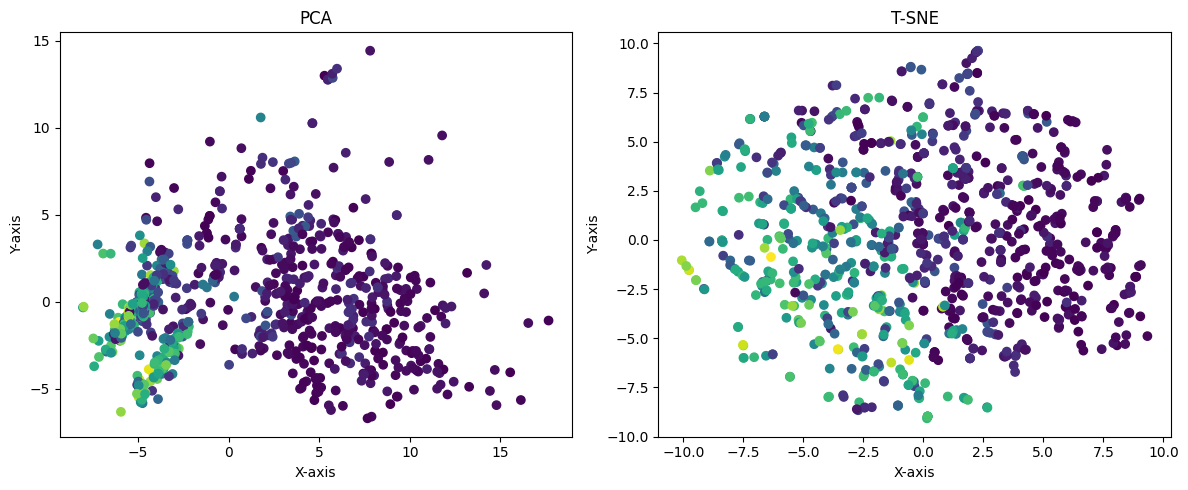

In [ ]:
plt.figure(figsize=(12, 5))  # Adjust the figure size as needed

# First subplot (left)

### START CODE ###
### Obtain components from PCA and plot
### END CODE ###

plt.subplot(1, 2, 1)  # 1 row, 2 columns, select the first subplot
plt.title('PCA')

# Second subplot (right)
plt.subplot(1, 2, 2)  # 1 row, 2 columns, select the second subplot

### START CODE ###
### scatter plot for t-SNE
### END CODE ###

plt.title('T-SNE')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()